### Take Home
#### name: Pranisaa Charnparttaravanit
Find an interesting dataset for unsupervised learning, prepare the data, and run $k$-means on it.

In a brief report, describe your in-lab and take home experiments and their results.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

### Import data

In [3]:
df = pd.read_csv("Country-data.csv")

print('Dataset information:\n')
df.info()
print('\nDataset head (first five rows):\n')
df.head()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB

Dataset head (first five rows):



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data Preparation

For this assignment, i decided to use only data on latitude, longtidue, price and review_per_month

In [4]:
col = ['id','name','host_id','host_name','neighbourhood_group',
       'neighbourhood','room_type','availability_365',
       'last_review','minimum_nights','calculated_host_listings_count','number_of_reviews']
df.drop(['country'], axis=1, inplace=True)

In [5]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### Drop Nan

In [6]:
df = df.dropna()

In [7]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [8]:
df.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Visualization

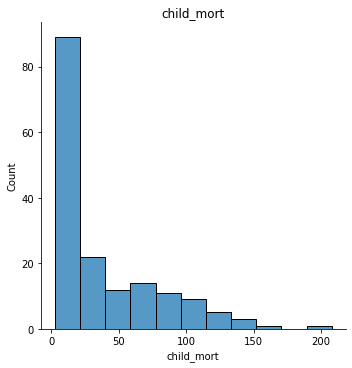

In [15]:
sns.displot(df.child_mort)
_ = plt.title('child_mort')

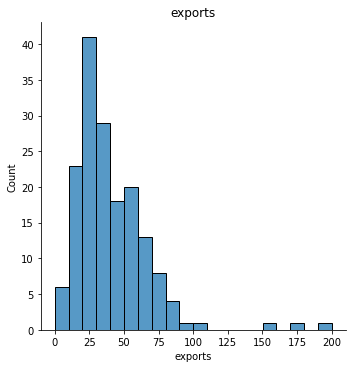

In [17]:
sns.displot(df.exports)
_ = plt.title('exports')

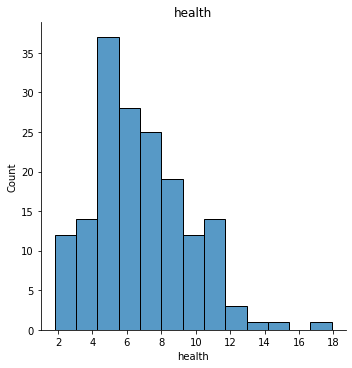

In [18]:
sns.displot(df.health)
_ = plt.title('health')

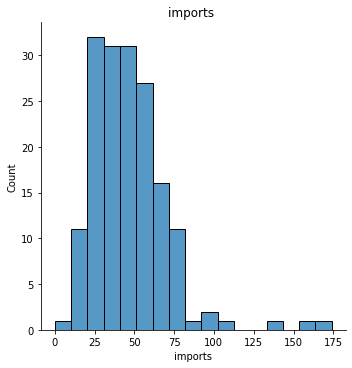

In [19]:
sns.displot(df.imports )
_ = plt.title('imports ')

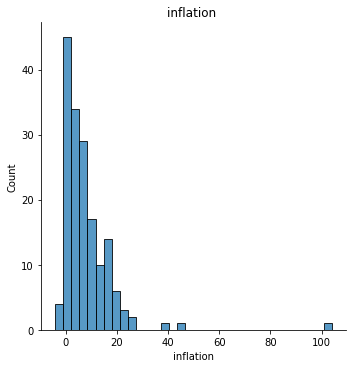

In [20]:
sns.displot(df.inflation )
_ = plt.title('inflation ')

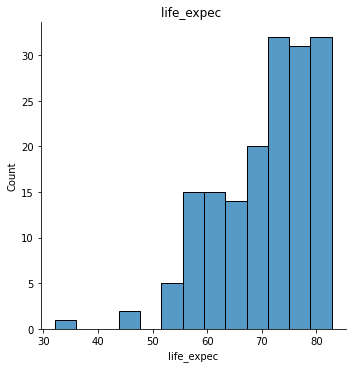

In [21]:
sns.displot(df.life_expec )
_ = plt.title('life_expec ')

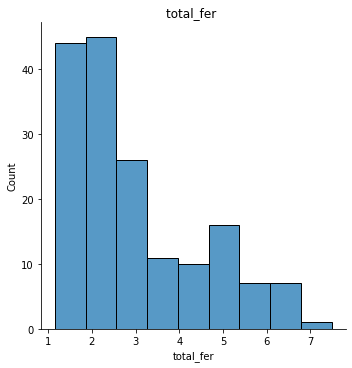

In [22]:
sns.displot(df.total_fer )
_ = plt.title('total_fer ')

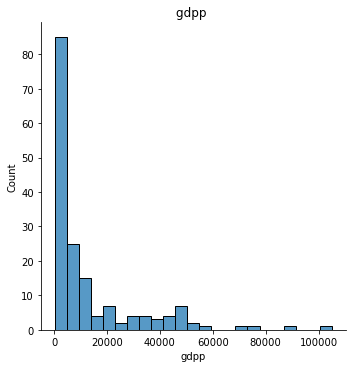

In [23]:
sns.displot(df.gdpp )
_ = plt.title('gdpp ')

### Performing K-means

In [9]:
# Initialize a k-means model given a dataset

def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k]
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means

# Run one iteration of k-means

def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
        distortion[i] = min_dist
        c[i] = min_j
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

### Find a suitable k

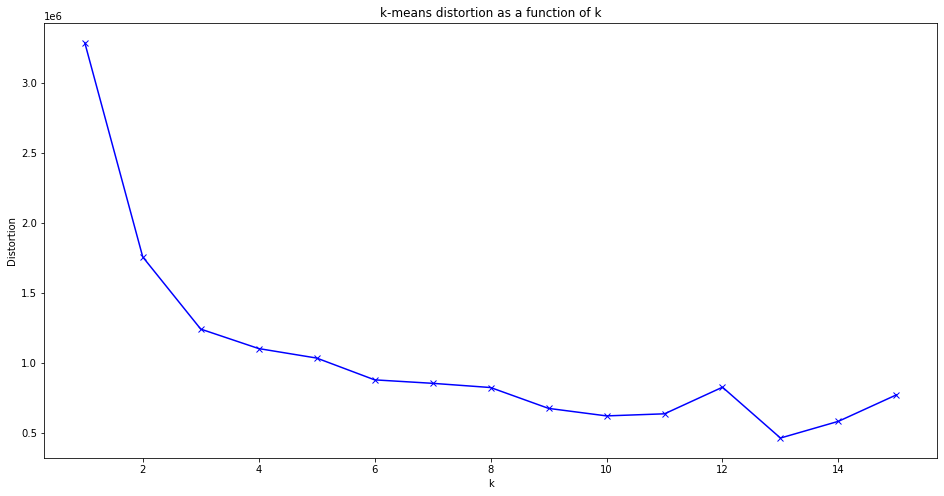

In [10]:
# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 15
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    means = init_kmeans(X, k)
    prev_distortion = 0
    while True:
        means, c, distortion = iterate_kmeans(X, means)
        if prev_distortion > 0 and prev_distortion - distortion < epsilon:
            break
        prev_distortion = distortion
    distortions[k-1] = distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
# plt.plot(range(1,max_k+1), distortion_k, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

# sudden increase, because of initialization ( initial cluster center is diffferent, its a cmpletely different arrangement not the existing cluster)

From the plot shown above, we can see the sloop of the grpah decreasing exponentially with the 'elbow' at around 3.
Therefore, the suitable k for this dataset is assumed to be at 3

In [25]:
#chosen k = 3
k = 3
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c

In [26]:
df['label'].unique()

array([2., 1., 0.])

Text(0, 0.5, 'child mortality')

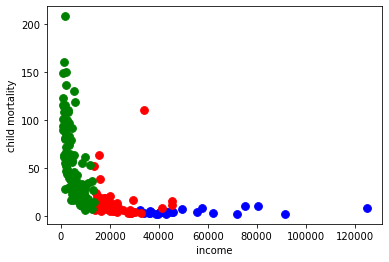

In [29]:
plt.scatter(df['income'][df.label == 0], df["child_mort"][df.label == 0], c='blue', s=60)
plt.scatter(df['income'][df.label == 1], df["child_mort"][df.label == 1], c='red', s=60)
plt.scatter(df['income'][df.label == 2], df["child_mort"][df.label == 2], c='green', s=60)
plt.xlabel('income')
plt.ylabel('child mortality')

### Pytorch

In [30]:
import torch
from kmeans_pytorch import kmeans

In [34]:
x =  torch.from_numpy(X)
device = 'cuda:0'
device = 'cpu'
c, means = kmeans(X=x, num_clusters=3, distance='euclidean', device=torch.device(device))
df["label"] = c
print(df['label'].unique())

[running kmeans]: 12it [00:00, 470.96it/s, center_shift=0.000000, iteration=12, tol=0.000100]     

running k-means on cpu..
[0 2 1]


Text(0, 0.5, 'child mortality')

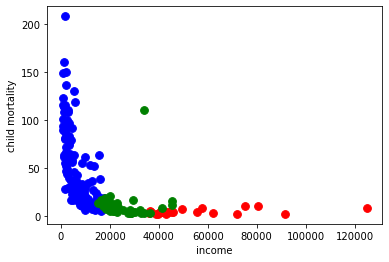

In [35]:
plt.scatter(df['income'][df.label == 0], df["child_mort"][df.label == 0], c='blue', s=60)
plt.scatter(df['income'][df.label == 1], df["child_mort"][df.label == 1], c='red', s=60)
plt.scatter(df['income'][df.label == 2], df["child_mort"][df.label == 2], c='green', s=60)
plt.xlabel('income')
plt.ylabel('child mortality')

### Report
Under this assignment we were asked to perform k-means clusing on a dataset taken from Kaggle. The dataset used in this lab is called an 'Country-data' which contains data of information such as child mortality, income, gdp etc of many countries.

After the data is imported, the column of country name was removed
Since some rows may contain Nan, it was also necessary to remove those in order to make sure that they dont interfere with our results.

However, before feeding the data into our k-means model, one important hyperparameter has to be chosen, which is the number of clusters 'k' we would like to used.
Therefore, it is important to find a suitable k. In order to do so, we looped through k's (1-20) to test whether which number of clusters is most suitable for our data set.
The results were plotted in the graph above wuth number of k vs distortion. As you can see, distortion decreases expoenential with a clear 'elbow' at around 3.
As a result, the number of clusters is decided to be 3.

I then perform k-means clustering with k as 3 both from the code provided in the lab class as well as pytorch.
The graphs plotted from the two methods can be seen above